# Air Quality Data Analysis

In [ ]:
#Air Quality Index

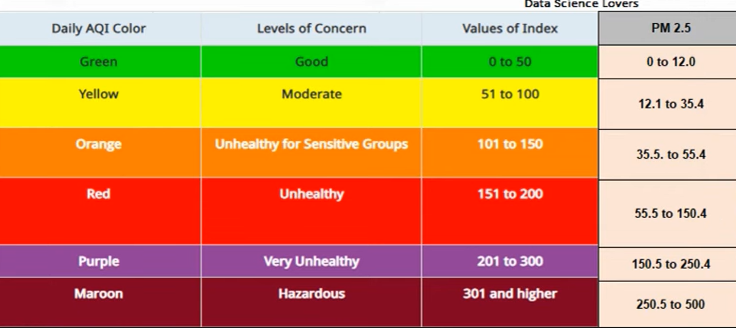

In [1]:
import pandas as pd

In [7]:
df=pd.read_csv(r"C:\Users\reeba\Downloads\air-quality-data.csv")


## Data Exploration


In [8]:
df.columns                                 

Index(['Timestamp', 'PM2.5'], dtype='object')

In [3]:
df.head()

,Timestamp,PM2.5
0,01-01-2018 00:00,90.19
1,01-01-2018 01:00,86.98
2,01-01-2018 02:00,86.06
3,01-01-2018 03:00,94.04
4,01-01-2018 04:00,108.78


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31861 entries, 0 to 31860
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Timestamp  31861 non-null  object 
 1   PM2.5      31861 non-null  float64
dtypes: float64(1), object(1)
memory usage: 498.0+ KB


In [5]:
df.shape

(31861, 2)

In [9]:
df.dtypes

Timestamp     object
PM2.5        float64
dtype: object

## Data Cleaning

In [6]:
df.isnull().sum()                                 # check for nulls

Timestamp    0
PM2.5        0
dtype: int64

In [12]:
df[df.duplicated()]                               # check for duplicates

,Timestamp,PM2.5


In [13]:
df['Timestamp']=pd.to_datetime(df['Timestamp'])   # change datatype of Timestamp from object to datetime

In [16]:
df['Year']=df['Timestamp'].dt.year
df['Month']=df['Timestamp'].dt.month
df['Hour']=df['Timestamp'].dt.hour                # add new columns viz Year,Month and Hour
df.columns

Index(['Timestamp', 'PM2.5', 'Year', 'Month', 'Hour'], dtype='object')

## Data Analysis and Visualization

### 1) Show the Year-wise average pollution with a Line chart

In [17]:
df.head()

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4


In [26]:
df1=df.groupby('Year')['PM2.5'].mean()        #form year-wise groups and compute the average of pollution
df1

Year
2018    54.468449
2019    49.511273
2020    42.386302
2021    44.850633
Name: PM2.5, dtype: float64

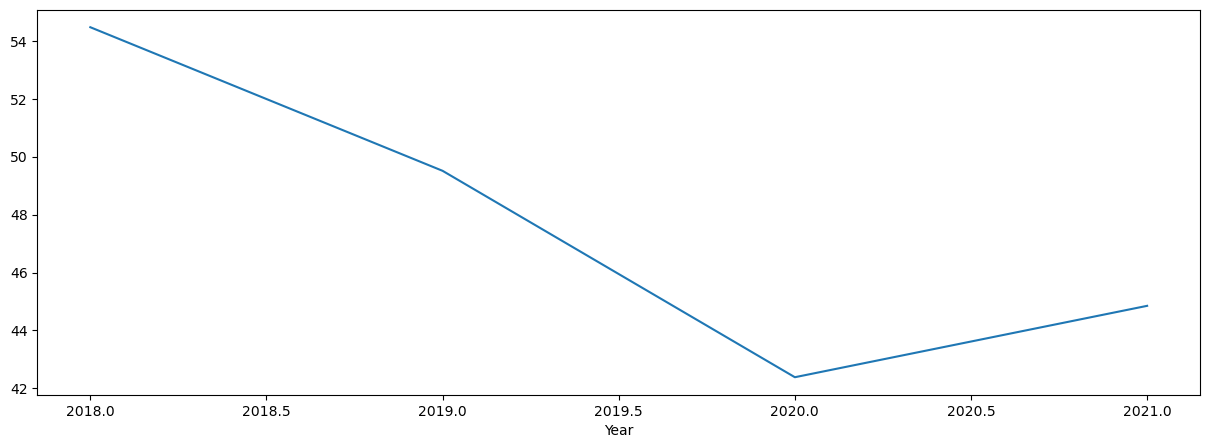

In [29]:
df1.plot(kind='line',figsize=(15,5));           # plot a line chart using pandas lib

### 2) Draw the Area plot showing the average pollution Month-wise

In [30]:
df.head()

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4


In [33]:
df2=df.groupby('Month')['PM2.5'].mean()          #form month-wise groups and compute the average of pollution

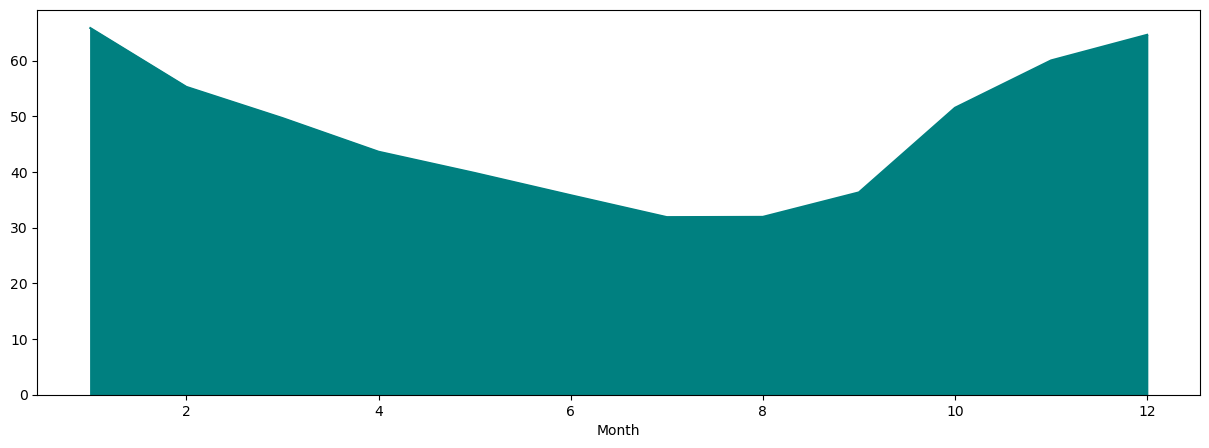

In [35]:
df2.plot(kind='area',figsize=(15,5),color='teal');            # plot a line chart using pandas lib

### 3) Draw a Bar graph to show the Hour-wise average pollution

In [38]:
df.head()

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4


In [39]:
df.groupby('Hour')['PM2.5'].mean()                     #form hour-wise groups and compute the average of pollution

Hour
0     47.068769
1     46.403946
2     46.952281
3     49.150798
4     51.296204
5     51.908798
6     49.907545
7     47.518554
8     44.996127
9     42.681736
10    40.931766
11    39.393820
12    38.789992
13    39.323346
14    42.638162
15    47.500464
16    51.244844
17    53.669757
18    54.317363
19    54.120371
20    52.784130
21    51.383525
22    49.940615
23    48.538064
Name: PM2.5, dtype: float64

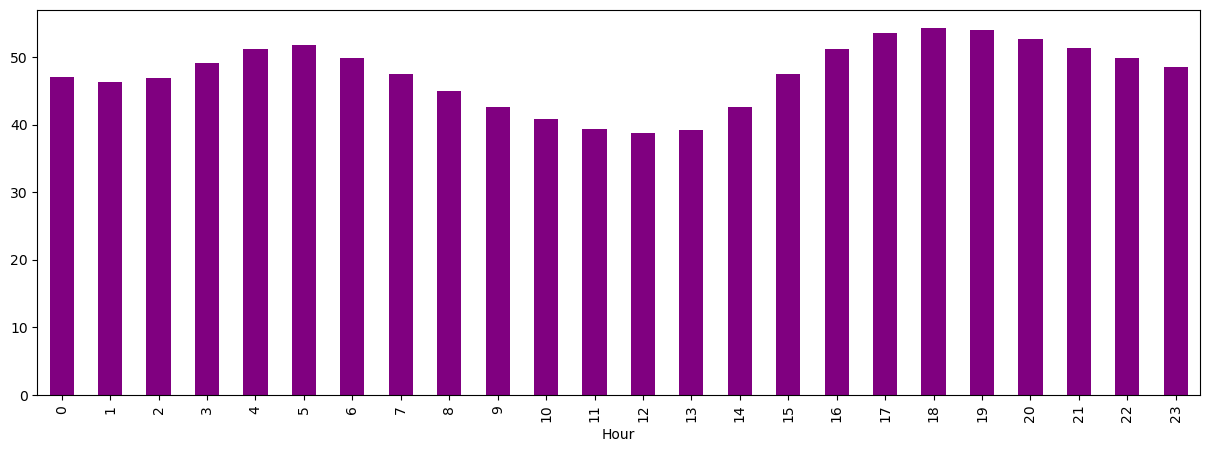

In [44]:
df.groupby('Hour')['PM2.5'].mean().plot(kind='bar',figsize=(15,5),color='purple');    #create a bar graph

### 4) In which month/s was the air  'Very Unhealthy'?

In [45]:
df.head()

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4


In [50]:
x=df[(df['PM2.5']>=150.5) & (df['PM2.5']<=250.4)]       #filtering data based on conditions
x

,Timestamp,PM2.5,Year,Month,Hour
6,2018-01-06 17:00:00,150.89,2018,1,17
7,2018-11-07 21:00:00,245.63,2018,11,21
8,2018-11-08 00:00:00,175.19,2018,11,0
31,2018-11-07 22:00:00,232.03,2018,11,22
32,2018-11-08 01:00:00,169.15,2018,11,1
55,2018-11-07 20:00:00,223.21,2018,11,20
56,2018-11-08 03:00:00,160.34,2018,11,3
79,2018-11-07 18:00:00,212.56,2018,11,18
103,2018-11-07 19:00:00,207.41,2018,11,19
126,2018-11-07 17:00:00,183.19,2018,11,17


In [51]:
x['Month'].value_counts() 

11    16
1      5
10     5
2      2
Name: Month, dtype: int64

In [ ]:
# Air quality was 'Very Unhealthy' in November.

### 5) In which month was the air fresh(good) ?

In [54]:
x1=df[df['PM2.5']<12]                           #filtering

In [55]:
x1['Month'].value_counts()

8    32
7     6
6     5
1     3
4     3
5     2
Name: Month, dtype: int64

In [ ]:
# Air quality was fresh in August.

### 6) In year 2018, how many times the AQI was recorded 'Moderate'?


In [57]:
len(df[(df['Year']==2018) & (df['PM2.5']>=12.5)& (df['PM2.5']<=35.4)])

2239

### 7) How was the weather in the month of January and July?

In [58]:
df.head()

,Timestamp,PM2.5,Year,Month,Hour
0,2018-01-01 00:00:00,90.19,2018,1,0
1,2018-01-01 01:00:00,86.98,2018,1,1
2,2018-01-01 02:00:00,86.06,2018,1,2
3,2018-01-01 03:00:00,94.04,2018,1,3
4,2018-01-01 04:00:00,108.78,2018,1,4


In [61]:
z=df[df['Month'].isin([1,7])]                                   #filtering

In [62]:
z.groupby('Month')['PM2.5'].mean()                              # mean pollution values in Jan and July

Month
1    65.829067
7    31.884161
Name: PM2.5, dtype: float64

In [ ]:
# Air quality was unhealthy in January and moderate in July